In [3]:
# Import necessary models
import pyspark
import pyspark.sql  as pyspark_sql
import pyspark.sql.functions as pyspark_functions
from pyspark import SparkConf

In [4]:
# Creating spark instance
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = pyspark_sql.SparkSession.builder.getOrCreate()

In [5]:
# Reading the dataset
col_mat_nuw_data = spark.read.csv("Datasets/col_mat_nuw_output.csv", header=None, inferSchema=True)

In [6]:
# Data Schema
col_mat_nuw_data.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: date (nullable = true)
 |-- _c3: date (nullable = true)


In [7]:
# Basic overview of the dataset
col_mat_nuw_data.show()

+--------------------+--------------+----------+----------+
|                 _c0|           _c1|       _c2|       _c3|
+--------------------+--------------+----------+----------+
|1.969834395781014...|Colombo Proper|2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|2019-01-12|2019-01-13|
|                null|Colombo Proper|2019-01-13|2019-01-14|
|1.336291906862603...|Colombo Proper|201

In [8]:
# Define the new column names
column_names = ['HCHO Reading', 'Location', 'Current Date', 'Next Date']

# Rename the columns
for item, col_name in enumerate(column_names):
    col_mat_nuw_data = col_mat_nuw_data.withColumnRenamed(col_mat_nuw_data.columns[item], col_name)

In [9]:
# Dataset with column names
col_mat_nuw_data.show()

+--------------------+--------------+------------+----------+
|        HCHO Reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                null|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

In [10]:
# Finding the null values
# Checking the sum of the Null values
col_mat_nuw_data.select(*[pyspark_functions.sum(pyspark_functions.col(c).isNull().cast("int")).alias(c) for c in col_mat_nuw_data.columns]).show()

+------------+--------+------------+---------+
|HCHO Reading|Location|Current Date|Next Date|
+------------+--------+------------+---------+
|        2419|       0|           0|        0|
+------------+--------+------------+---------+


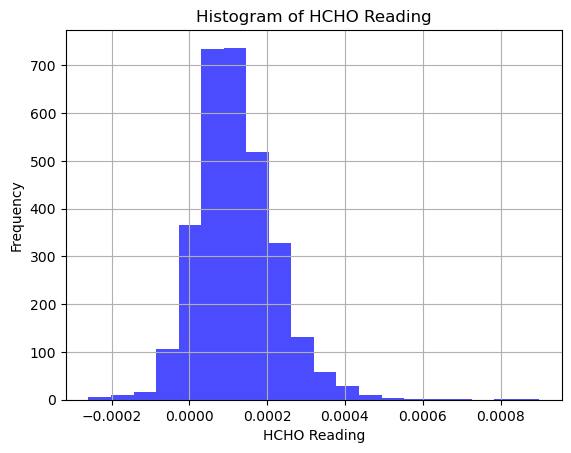

In [11]:
import matplotlib.pyplot as plt

# Convert the Spark DataFrame to Pandas DataFrame for plotting
pandas_df = col_mat_nuw_data.toPandas()

# Plotting histogram for 'HCHO Reading' column
plt.hist(pandas_df['HCHO Reading'], bins=20, color='blue', alpha=0.7)
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.title('Histogram of HCHO Reading')
plt.grid(True)
plt.show()


In [13]:
# Calculate the mean of 'HCHO Reading' column
hcho_mean = col_mat_nuw_data.select(pyspark_functions.mean('HCHO Reading')).collect()[0][0]

# Replace null values in 'HCHO Reading' column with the calculated mean
col_mat_nuw_data_imputed = col_mat_nuw_data.withColumn('HCHO Reading', pyspark_functions.when(col_mat_nuw_data['HCHO Reading'].isNull(), hcho_mean).otherwise(col_mat_nuw_data['HCHO Reading']))

# Show the DataFrame with null values replaced by mean value in 'HCHO Reading' column
col_mat_nuw_data_imputed.show()

# Check if there are any null values left
col_mat_nuw_data_imputed.select(*[pyspark_functions.sum(pyspark_functions.col(c).isNull().cast("int")).alias(c) for c in col_mat_nuw_data_imputed.columns]).show()


+--------------------+--------------+------------+----------+
|        HCHO Reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|1.200429799620477...|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

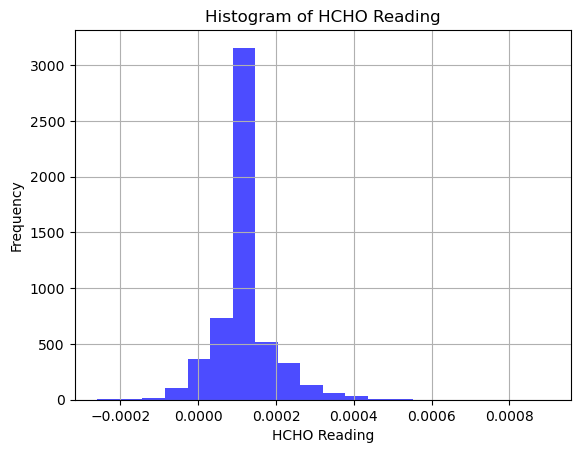

In [14]:
import matplotlib.pyplot as plt

# Convert the DataFrame to Pandas DataFrame for plotting
pandas_df = col_mat_nuw_data_imputed.toPandas()

# Plotting histogram for 'HCHO Reading' column
plt.hist(pandas_df['HCHO Reading'], bins=20, color='blue', alpha=0.7)
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.title('Histogram of HCHO Reading')
plt.grid(True)
plt.show()


In [17]:
# Remove duplicates
col_mat_nuw_data_no_duplicates = col_mat_nuw_data_imputed.dropDuplicates()

# Show the DataFrame without duplicates
col_mat_nuw_data_no_duplicates.show()


+--------------------+----------------+------------+----------+
|        HCHO Reading|        Location|Current Date| Next Date|
+--------------------+----------------+------------+----------+
|1.981789630254356E-4|  Colombo Proper|  2019-02-11|2019-02-12|
|2.548286008604607E-4|  Colombo Proper|  2019-03-13|2019-03-14|
|1.399382956399640...|  Colombo Proper|  2019-04-24|2019-04-25|
|1.200429799620477...|  Colombo Proper|  2019-08-22|2019-08-23|
|1.967218725518155...|  Colombo Proper|  2020-07-23|2020-07-24|
| 1.58109816407928E-4|  Colombo Proper|  2020-08-29|2020-08-30|
|8.078253427334957E-5|  Colombo Proper|  2021-06-25|2021-06-26|
|1.679734273305888...|  Colombo Proper|  2023-06-05|2023-06-06|
|7.521904743490836E-5|Deniyaya, Matara|  2019-05-05|2019-05-06|
|8.076289701838124E-5|Deniyaya, Matara|  2019-06-30|2019-07-01|
|1.659523665068428E-4|Deniyaya, Matara|  2020-03-28|2020-03-29|
|1.043614608600564...|Deniyaya, Matara|  2020-08-26|2020-08-27|
|8.774188287425133E-5|Deniyaya, Matara| 

In [18]:
# Loop through each column
for col_name in col_mat_nuw_data_imputed.columns:
    # Select the column and get distinct values
    unique_values = col_mat_nuw_data_imputed.select(col_name).distinct()
    # Convert the result to a list and print
    unique_values_list = [row[col_name] for row in unique_values.collect()]
    print(f"Unique values in column '{col_name}':")
    for value in unique_values_list:
        print(value)
    print()


Unique values in column 'HCHO Reading':
8.925810029372805e-05
0.00014850558862324745
0.00011446567844384171
0.00016244227498501997
0.00018436719413891003
0.0002289257347507758
0.00015686944366597976
0.0002955471068557156
7.345198097368317e-05
0.00011583545938248391
7.002533500214887e-05
4.0722158054193994e-05
7.456395320699945e-05
3.090292903243917e-05
0.00016223083436213767
0.0002984725432944723
0.00010769374623524847
0.00011020701480585242
0.0001614190987342073
0.00024125468853162014
5.6520401395373903e-05
0.00014322307671692466
6.279599504086146e-05
0.00013959025484745952
5.667476364560356e-05
0.00011732463422556846
9.969666763326336e-05
1.917795009592158e-06
-4.922578568208555e-05
8.892517616661547e-05
8.275653874941797e-05
0.00012572947997579583
0.00011804826677501793
0.00022223214977413986
0.00013688992504868347
0.00021914461628010608
6.569158932740452e-05
-0.00011215378939636268
7.442722707856339e-05
1.6985332973000637e-05
8.720108094777346e-05
0.00010436146086005643
2.227472545

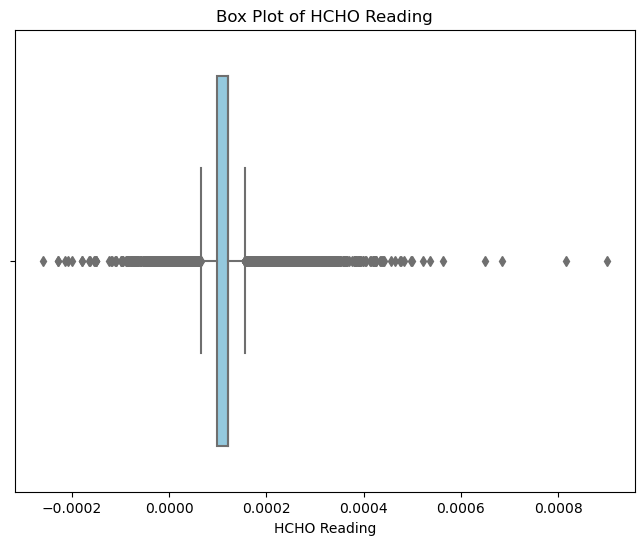

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame for plotting
pandas_df = col_mat_nuw_data_imputed.select('HCHO Reading').toPandas()

# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=pandas_df['HCHO Reading'], color='skyblue')
plt.title('Box Plot of HCHO Reading')
plt.xlabel('HCHO Reading')
plt.show()


In [24]:
from pyspark.sql.functions import col

# Filter out rows with 'HCHO Reading' above 0.0008
col_mat_nuw_data_filtered = col_mat_nuw_data_imputed.filter(col('HCHO Reading') <= 0.0006)

# Show the DataFrame after removing outliers
col_mat_nuw_data_filtered.show()


+--------------------+--------------+------------+----------+
|        HCHO Reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|1.200429799620477...|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

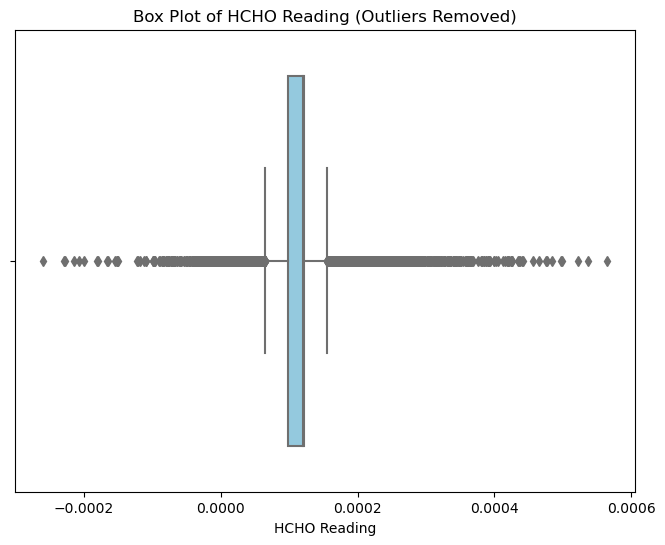

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the filtered Spark DataFrame to Pandas DataFrame for plotting
pandas_df_filtered = col_mat_nuw_data_filtered.select('HCHO Reading').toPandas()

# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=pandas_df_filtered['HCHO Reading'], color='skyblue')
plt.title('Box Plot of HCHO Reading (Outliers Removed)')
plt.xlabel('HCHO Reading')
plt.show()
